# Week 11 "Pre-lecture" HW08

### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*

(a) A Classification Decision Tree is used to solve problems where we need to classify data into distinct categories based on input features. It works by splitting the data into branches using rules based on the features until it reaches a decision, which is the predicted category. This method is useful in real-world applications like detecting spam emails (spam vs. not spam), diagnosing diseases based on symptoms (e.g., flu, cold, or allergy), or deciding if a loan applicant is high-risk or low-risk based on their credit history.

(b) A Classification Decision Tree predicts by creating a series of splits in the data based on the values of input features. At each split, it chooses the feature and threshold that best separate the data into distinct classes. The tree keeps branching out until it reaches a "leaf node," which represents the final class prediction. At a leaf node, the class is determined by the majority of training examples that fall into that node. For example, if a leaf contains 80% "yes" samples and 20% "no" samples, the tree will classify new data falling into this node as "yes."

In contrast, Multiple Linear Regression predicts continuous outcomes by finding a mathematical equation (a straight line, or plane in higher dimensions) that best fits the training data. It calculates the weighted sum of the input features and adds a bias term to make predictions, which are numeric rather than categorical.

---
### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*


1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

A weather prediction system classifying whether it will rain or not. Accuracy is useful when both correct positive (rain prediction) and negative (no rain prediction) results are equally important, and false positives and false negatives have similar consequences. For example, knowing whether to prepare for rain impacts everyday decisions, but the costs of a false rain or no-rain prediction are not significantly different.
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

A medical test for detecting a rare but serious disease, like cancer. Sensitivity is crucial in cases where missing a positive case (false negative) could have severe consequences. For instance, if a cancer test has low sensitivity, it might miss patients who actually have cancer, leading to delayed treatment and worse outcomes.


3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

Screening for drug use in athletes before competitions. Specificity matters when it's important to avoid falsely labeling someone as positive (false positive). A low-specificity drug test might unfairly disqualify clean athletes, damaging their careers, even though the consequences of missing a true positive might be less severe in comparison.

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

Spam email filters. Precision is important when a false positive (marking a legitimate email as spam) is more problematic than a false negative (letting a spam email through). A filter with low precision might block important emails, frustrating users, while letting a few spam emails through might be less harmful.

---
### Summaries of my ChatBot session (Q#1-2) (01)
**Link to the this chat log history for "Pre-lecture" HW:** https://chatgpt.com/share/673b8406-99ac-8011-bb22-70db94ded60d

Here’s a concise summary of our exchanges for your homework submission:

---

#### **1. Classification Decision Trees and Multiple Linear Regression**
- **Classification Decision Trees**: Address classification problems by predicting categorical labels through a series of decision rules. 
  - **Examples**: Medical diagnosis, credit risk assessment, customer churn prediction, spam detection, and fraud detection.
  
- **Multiple Linear Regression**: Predicts continuous numeric outcomes using a linear combination of input features.
  - **Examples**: Predicting house prices, stock market values, or temperatures.

- **Key Differences**:
  - **Output**: Decision trees produce categorical outputs, while linear regression provides continuous values.
  - **Mechanism**: Trees split data using decision rules; regression applies a linear equation to calculate predictions.

---

#### **2. Metrics and Real-World Applications**
We explored the definitions of key metrics and their real-world applications:

1. **Accuracy**:
   - **Definition**: Proportion of true results (both true positives and true negatives) in the total population.
   - **Examples**: Weather prediction systems classifying rain vs. no rain; email spam filters (if spam and non-spam are balanced).

2. **Sensitivity (Recall)**:
   - **Definition**: Proportion of actual positives that are correctly identified.
   - **Examples**: Medical tests for detecting rare diseases, search-and-rescue operations.

3. **Specificity**:
   - **Definition**: Proportion of actual negatives that are correctly identified.
   - **Examples**: Drug testing in athletes before competitions, email spam filters (avoiding marking legitimate emails as spam).

4. **Precision**:
   - **Definition**: Proportion of positive identifications that were actually correct.
   - **Examples**: Spam email filters (minimizing false positives), fraud detection systems.

---

#### **3. Evaluation of Your Examples**
You provided examples for each metric, and they were assessed as appropriate:
- **Accuracy**: Weather prediction system (appropriate for balanced datasets).
- **Sensitivity**: Medical test for rare, serious diseases (excellent choice, as missing positives is critical).
- **Specificity**: Drug testing for athletes (correct, as avoiding false positives is key).
- **Precision**: Spam filters (relevant, as false positives are problematic).


---
### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below

 1. remove `Weight_oz`, `Width`, and `Height` 
 2. drop all remaining rows with `NaN` entries 
 3. set `Pub year` and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`

In [21]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# remove Weight_oz, Width, and Height
columns_to_drop = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_drop, axis=1)

# drop all remaining rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna().copy()

# set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# some initital standard EDA and data summarization

# basic dataset information
print("Dataset Information:")
print(ab_reduced_noNaN.info())
print('---' * 36)

# the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(ab_reduced_noNaN.head())
print('---' * 36)

# summary statistics for numerical and categorical data
print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe(include='all'))
print('---' * 36)

# check unique values for categorical columns to understand their distribution
categorical_columns = ab_reduced_noNaN.select_dtypes(include='category').columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(ab_reduced_noNaN[col].value_counts())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
------------------------------------------------------------------------------------------------------------

First 5 Rows of the Dataset:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of

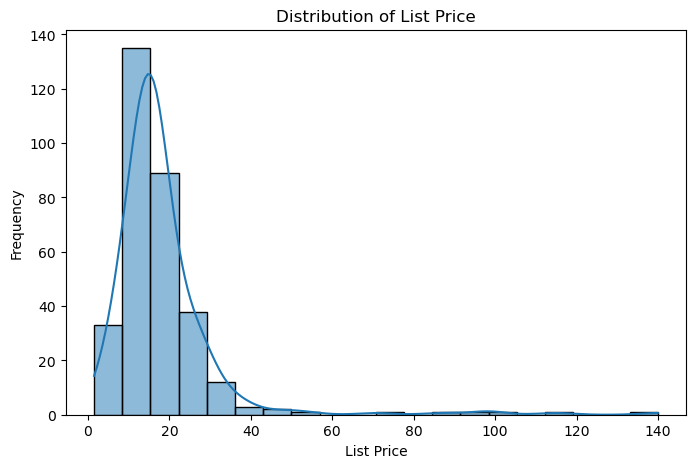

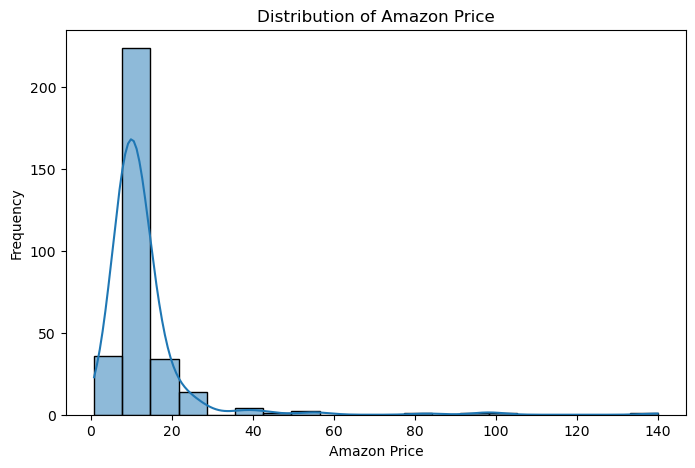

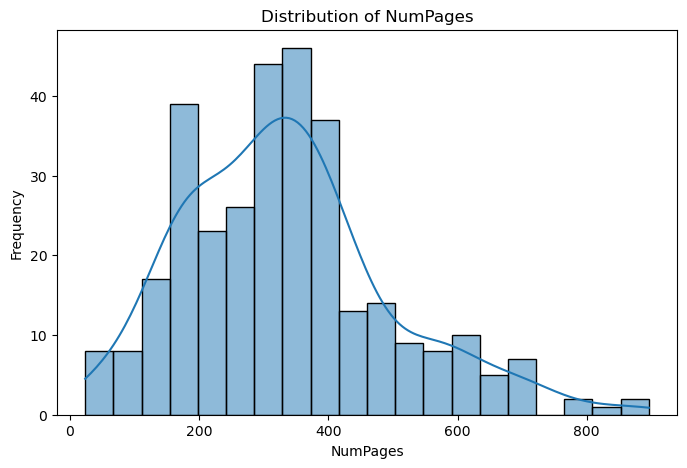

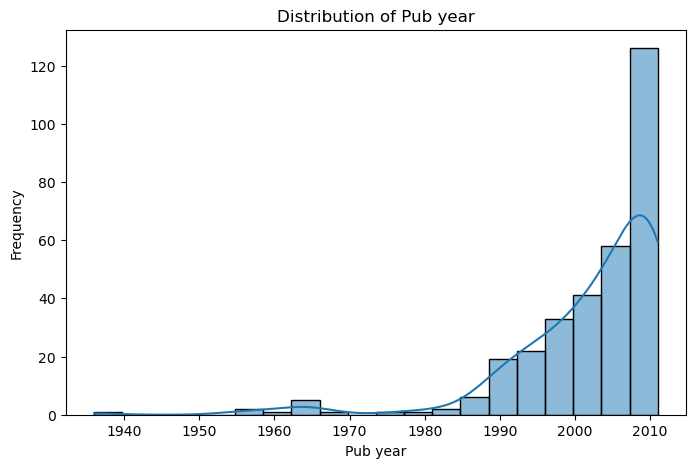

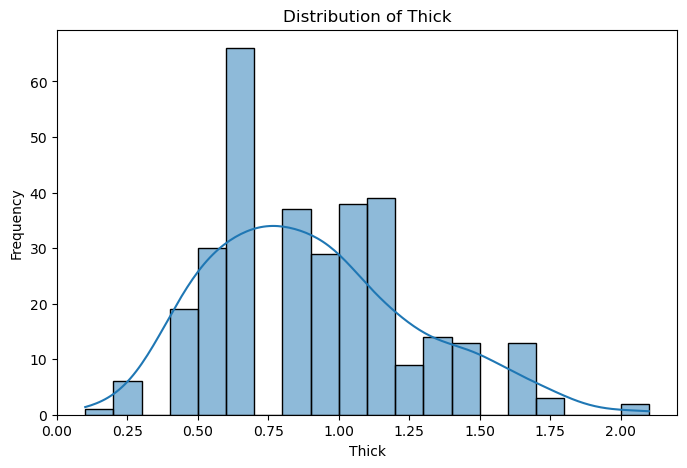

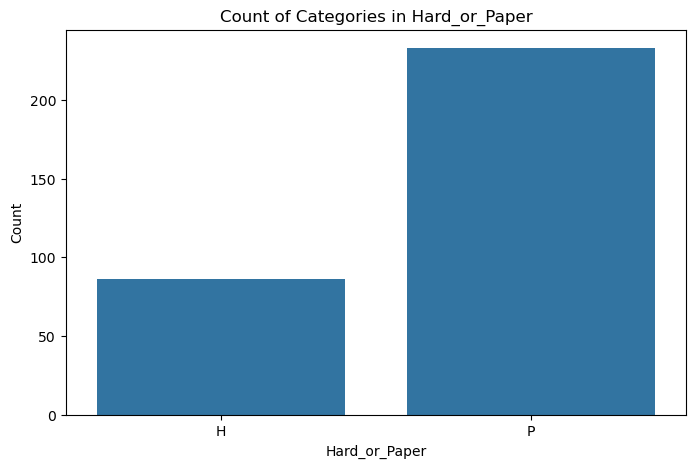


Summary Statistics for Numerical Columns:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.000000  1936.000000    0.100000
25%     13.890000      8.600000  208.000000  1998.000000    0.600000
50%     15.000000     10.200000  320.000000  2005.000000    0.900000
75%     19.360000     12.560000  416.000000  2010.000000    1.100000
max    139.950000    139.950000  896.000000  2011.000000    2.100000

Frequency Counts for Categorical Columns:

Hard_or_Paper:
Hard_or_Paper
P    233
H     86
Name: count, dtype: int64


In [26]:
# more 

import matplotlib.pyplot as plt
import seaborn as sns

# histograms with KDE for numerical columns
numerical_columns = ab_reduced_noNaN.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=ab_reduced_noNaN, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# bar charts for categorical columns
categorical_columns = ab_reduced_noNaN.select_dtypes(include='category').columns

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=ab_reduced_noNaN, x=col)
    plt.title(f'Count of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(ab_reduced_noNaN[numerical_columns].describe())

# frequency counts for categorical columns
print("\nFrequency Counts for Categorical Columns:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(ab_reduced_noNaN[col].value_counts())


---
### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

# set the random seed for reproducibility
np.random.seed(130)

# rerform the 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, 
    train_size=0.8
)

# report the number of observations in each set
print(f"Number of observations in the training set: {ab_reduced_noNaN_train.shape[0]}")
print(f"Number of observations in the testing set: {ab_reduced_noNaN_test.shape[0]}")


Number of observations in the training set: 255
Number of observations in the testing set: 64


---
### Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and (a) ask what the two steps given below are doing; (b) then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; (c) finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model

```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```
(a) The two lines of code prepare data for fitting a DecisionTreeClassifier in scikit-learn:

1. y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
This creates the binary target variable y:
- Hard_or_Paper: A categorical column with values like 'H' (Hardcover) and 'P' (Paperback).
- pd.get_dummies: Converts the column into binary (one-hot encoded) format.
- ['H']: Selects the 'H' column, where 1 indicates Hardcover and 0 otherwise.

2. X = ab_reduced_noNaN[['List Price']]
This creates the feature matrix X:
- Selects the List Price column as a DataFrame for the predictor variable.

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Step 1: Prepare the target variable `y` for training and testing
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Step 2: Prepare the feature matrix `X` for training and testing
X_train = ab_reduced_noNaN_train[['List Price']]
X_test = ab_reduced_noNaN_test[['List Price']]

# Step 3: Initialize the DecisionTreeClassifier with a max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 4: Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.376\nsamples = 255\nvalue = [191, 64]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.174\nsamples = 177\nvalue = [160, 17]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.331\nsamples = 43\nvalue = [34, 9]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.112\nsamples = 134\nvalue = [126, 8]'),
 Text(0.75, 0.5, 'x[0] <= 29.475\ngini = 0.479\nsamples = 78\nvalue = [31, 47]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.4\nsamples = 58\nvalue = [16, 42]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 20\nvalue = [15, 5]')]

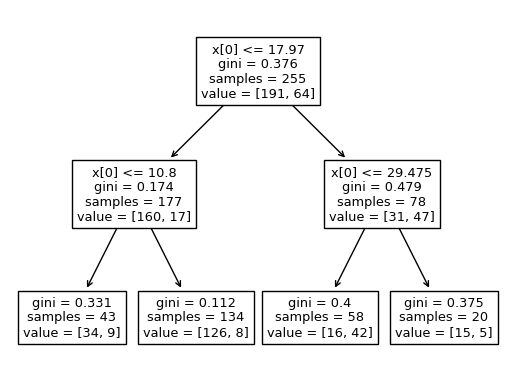

In [34]:
# part (c)

tree.plot_tree(clf)

#### Top Node:
The first decision rule is: x[0] <= 17.97
- If the "List Price" is less than or equal to 17.97, the model moves to the left subtree.
- If the "List Price" is greater than 17.97, the model moves to the right subtree.
- There are 255 samples at this node, with the value [191, 64] indicating 191 Hardcover books ('H' = 1) and 64 not Hardcover ('H' = 0).

---

#### Left Subtree (List Price <= 17.97):
The next decision rule is: x[0] <= 10.8
- If the "List Price" is less than or equal to 10.8, the model moves to the left leaf.
- If the "List Price" is greater than 10.8, the model moves to the right leaf.
- There are 177 samples, with [160, 17] representing 160 Hardcover and 17 not Hardcover.

#### Left Leaf (List Price <= 10.8):
- 43 samples, with [34, 9] representing 34 Hardcover and 9 not Hardcover.
- Prediction: The majority class is Hardcover ('H' = 1).

#### Right Leaf (10.8 < List Price <= 17.97):
- 134 samples, with [126, 8] representing 126 Hardcover and 8 not Hardcover.
- Prediction: The majority class is Hardcover ('H' = 1).

---

#### Right Subtree (List Price > 17.97):
The next decision rule is: x[0] <= 27.275
- If the "List Price" is less than or equal to 27.275, the model moves to the left leaf.
- If the "List Price" is greater than 27.275, the model moves to the right leaf.
- There are 78 samples, with [31, 47] representing 31 Hardcover and 47 not Hardcover.

#### Left Leaf (17.97 < List Price <= 27.275):
- 58 samples, with [16, 42] representing 16 Hardcover and 42 not Hardcover.
- Prediction: The majority class is not Hardcover ('H' = 0).

#### Right Leaf (List Price > 27.275):
- 20 samples, with [15, 5] representing 15 Hardcover and 5 not Hardcover.
- Prediction: The majority class is Hardcover ('H' = 1).

# Week 11 "Post-lecture" HW08

### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
2. `max_depth` set to `4`

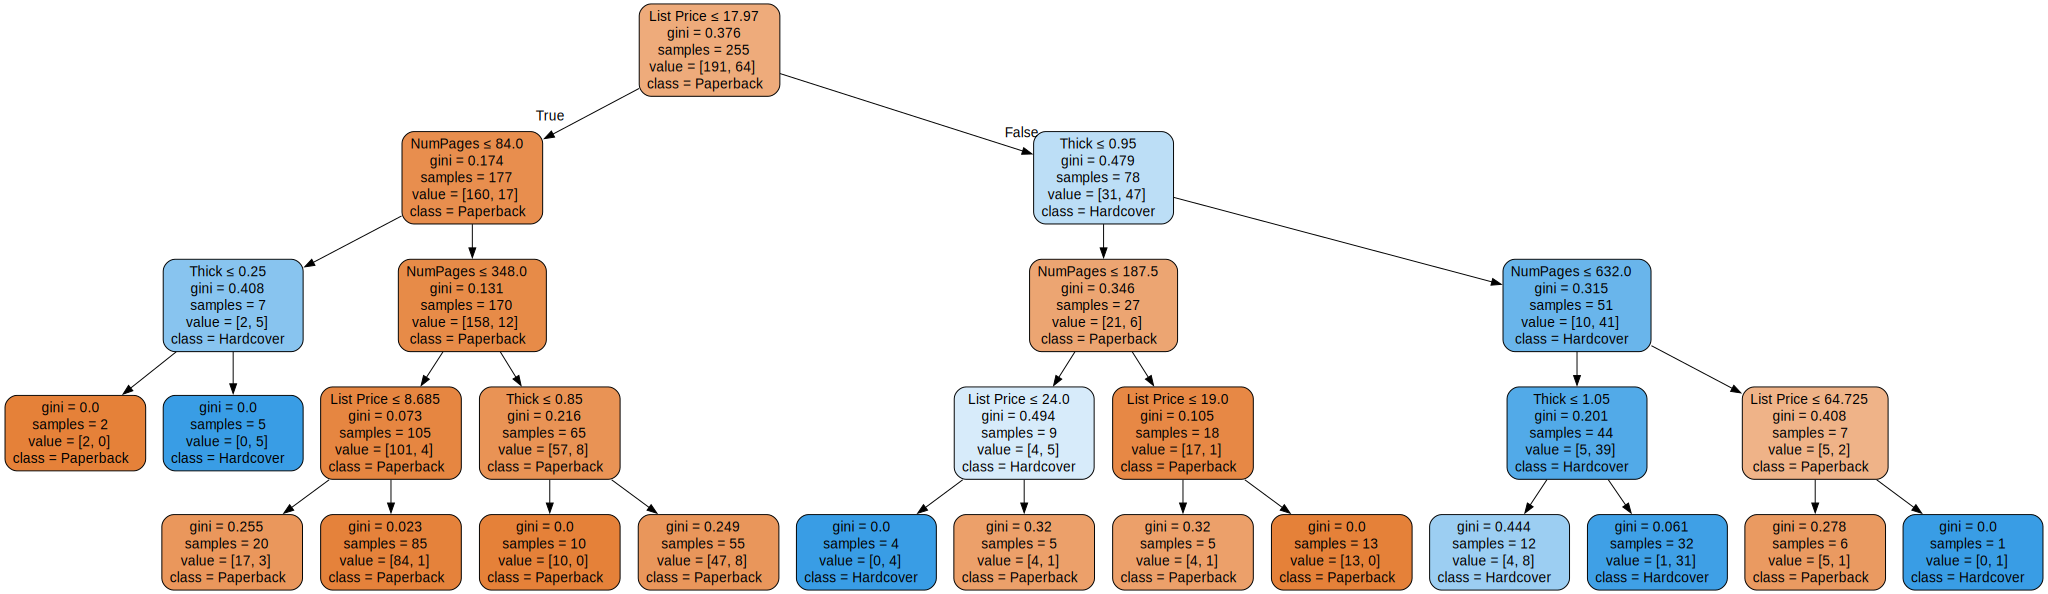

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Step 1: Prepare the target variable `y`
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Step 2: Prepare the feature matrix `X` with multiple predictors
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Step 3: Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Step 4: Train the classifier
clf2.fit(X_train, y_train)

# Step 5: Visualize the decision tree using graphviz
dot_data = export_graphviz(
    clf2, 
    out_file=None, 
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Render the tree inline in Jupyter Notebook
graph = graphviz.Source(dot_data)
graph


For the clf2 model, predictions are made by following a series of rules starting from the root node. At each node, a condition based on one of the features (e.g., List Price, NumPages, or Thick) determines whether the sample moves to the left or right child node. This process continues down the tree until the sample reaches a leaf node, where the final prediction is made.

The root node represents the first split. For example, the model checks whether the "List Price" is less than or equal to 17.97. If the condition is true, the sample follows the left branch; otherwise, it follows the right branch. Subsequent nodes apply additional conditions, such as whether NumPages is less than or equal to a certain value or whether Thick is below a threshold. Each node reduces the remaining uncertainty in the classification by narrowing down the possible outcomes.

Leaf nodes represent the final decision points of the tree. These nodes assign a class (e.g., "Paperback" or "Hardcover") based on the majority class of the samples at that node. For example, at a particular leaf node, if most of the training samples were classified as "Paperback," the model will predict "Paperback" for any new sample that reaches that leaf. 

---
### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Predict on the test set for both models
y_test_pred_clf = clf.predict(X_test[['List Price']])  # Single feature model
y_test_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])  # Multi-feature model

# Step 2: Compute confusion matrices
cm_clf = confusion_matrix(y_test, y_test_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_test_pred_clf2)

# Step 3: Define functions for metrics
def calculate_metrics(cm):
    # Extract confusion matrix components
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    return sensitivity, specificity, accuracy

# Step 4: Calculate metrics for both models
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Step 5: Round metrics to three significant digits
sensitivity_clf = np.round(sensitivity_clf, 3)
specificity_clf = np.round(specificity_clf, 3)
accuracy_clf = np.round(accuracy_clf, 3)

sensitivity_clf2 = np.round(sensitivity_clf2, 3)
specificity_clf2 = np.round(specificity_clf2, 3)
accuracy_clf2 = np.round(accuracy_clf2, 3)

# Step 6: Report Results
print("Confusion Matrix for clf:")
print(cm_clf)
print(f"Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}")

print("\nConfusion Matrix for clf2:")
print(cm_clf2)
print(f"Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")


Confusion Matrix for clf:
[[39  3]
 [ 9 13]]
Sensitivity: 0.591, Specificity: 0.929, Accuracy: 0.812

Confusion Matrix for clf2:
[[41  1]
 [12 10]]
Sensitivity: 0.455, Specificity: 0.976, Accuracy: 0.797


---
### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```


The differences between the two confusion matrices arise from the predictor variables used in the models. The first confusion matrix uses only List Price as the predictor, while the second confusion matrix incorporates NumPages, Thick, and List Price. The additional predictors in the second model allow it to capture more nuanced relationships between the features and the target variable, leading to potentially better performance (e.g., higher sensitivity, specificity, or accuracy).

The confusion matrices for clf and clf2 on the test set (from the earlier question) are better because they reflect the models' ability to generalize to unseen data. In contrast, the confusion matrices above are based on the training set, which risks overestimating performance since the model has already "seen" this data during training and may have overfit it. Test set evaluations are more reliable for assessing the real-world utility of a model.

---
### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*

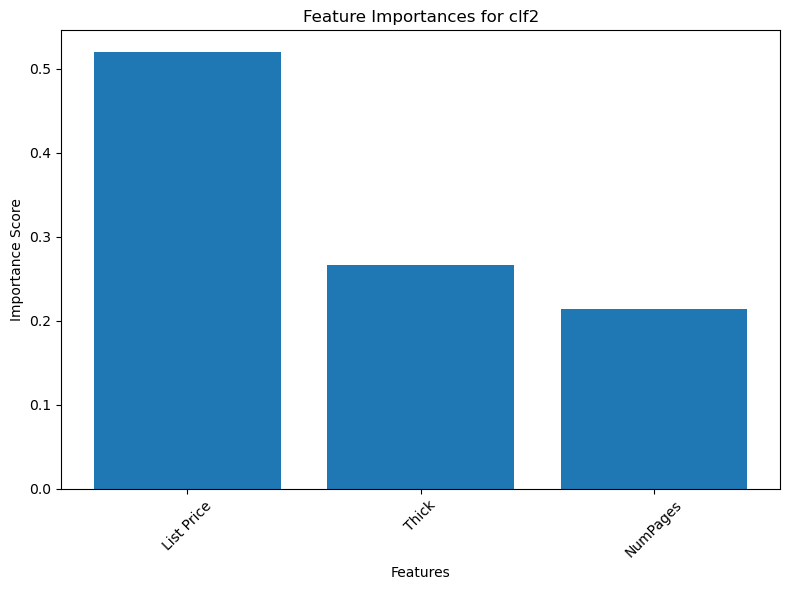

In [38]:
# Feature names for clf2
feature_names = ['NumPages', 'Thick', 'List Price']
importances = clf2.feature_importances_

# Sort features by importance in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importances for clf2")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [39]:
# Get the feature names and importances
feature_names = clf2.feature_names_in_  # Automatically captured from the training data
importances = clf2.feature_importances_

# Find the most important feature
most_important_index = np.argmax(importances)  # Index of the largest importance
most_important_feature = feature_names[most_important_index]  # Feature name
most_important_value = importances[most_important_index]  # Feature importance score

print(f"The most important feature is '{most_important_feature}' with an importance score of {most_important_value:.3f}.")


The most important feature is 'List Price' with an importance score of 0.520.


---
### Summaries of my ChatBot session (Q#3-8) (02)
**Link to the this chat log history:** https://chatgpt.com/share/673bb43a-167c-8011-92ca-07aba6110cb3

#### **Summary of Our Exchanges**

#### **1. Training a Classification Decision Tree**
We started by discussing how to train a **classification decision tree** (`clf2`) using multiple predictors (`NumPages`, `Thick`, `List Price`) to predict whether a book is a hardcover or paperback. The model was trained with a maximum depth of 4 using the pre-split training dataset (`ab_reduced_noNaN_train`). The following steps were performed:
- Preparing the target variable (`y_train`).
- Preparing the feature matrix with three predictors.
- Fitting the decision tree classifier (`clf2`).

---

#### **2. Feature Importances**
We explored how to identify and visualize feature importances for the decision tree:
- **Feature Importances** (`clf2.feature_importances_`):
  - This attribute provides the relative importance of each predictor variable based on how much they reduce impurity across the tree splits.
- **Feature Names** (`clf2.feature_names_in_`):
  - This attribute provides the names of the features used in training.
- A bar chart visualization was created to show the relative importance of each predictor. Features were sorted in descending order of importance.

---

#### **3. Key Concepts**
- **Feature Importance**:
  - Helps identify which predictors are most influential in the model.
  - Example code used `np.argmax(importances)` to find the most important feature based on its importance score.
- **`feature_names_in_`**:
  - Explained how this attribute maps the indices of `feature_importances_` to the actual feature names for interpretation.

---

#### **4. Model Interpretation**
We discussed how decision trees:
- Evaluate all possible splits at each step.
- Choose splits that maximize improvement in a criterion (e.g., Gini impurity or Shannon entropy).
- Use feature importance scores to measure the contribution of predictors.

---

#### **5. Simplifying Decision Tree Concepts**
We simplified explanations of:
- The process of fitting decision trees.
- Feature importance and how it is calculated.
- The trade-off between complexity and overfitting, highlighting the use of methods like `GridSearchCV` for tuning hyperparameters like `max_depth`.

---

#### **6. Addressing Specific Questions**
You asked detailed questions, and we clarified:
- How to visualize feature importances.
- The meaning of `np.argmax(importances)` for identifying the most important feature.
- That `clf2.feature_names_in_` returns a NumPy array of feature names, which behaves similarly to a list.

---

#### **Key Learning Outcomes**
- You learned how to train a decision tree classifier with multiple predictors and interpret its outputs.
- You explored feature importance as a method to understand the contribution of predictors.
- You understood the significance of attributes like `feature_importances_` and `feature_names_in_` for interpreting the decision tree model.

Let me know if you need any edits or additional points!

---
### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, coefficients represent the expected change in the outcome variable for a one-unit increase in the predictor variable, holding all other variables constant, making interpretation straightforward and grounded in the linear relationship between predictors and the response. In contrast, feature importances in decision trees quantify the relative contribution of each feature to improving the model's predictive power (e.g., through reductions in Gini impurity) but do not indicate specific directional or proportional effects on the outcome.

---
### Summaries of my ChatBot session (Q#9) (03)
**Link to the this chat log history for "Post-lecture" HW:** https://chatgpt.com/share/673bd802-32b8-8011-9423-dc8403c77f01

Here’s a summary of our exchanges for your homework record:

---

#### Interaction Summary

1. **Initial Query (Understanding Coefficients and Feature Importances)**:  
   You asked about the difference between interpreting coefficients in linear regression and feature importances in decision trees. I explained that:

   - In **linear regression**, coefficients indicate how much the predicted value changes with a one-unit increase in a feature, assuming other features remain constant.  
   - In **decision trees**, feature importances measure how much each feature contributes to improving the model’s ability to make correct predictions, but they don’t provide a direct relationship or a specific numerical effect on the outcome.

   **Example Provided**:
   - In linear regression, if the coefficient for "study hours" is **5**, an extra hour of study increases the test score by 5 points.
   - In decision trees, if "study hours" has an importance of **0.6** and "sleep hours" has **0.4**, it shows that "study hours" are more influential, but it doesn’t explain exactly how the outcome changes.

   **Simplified Explanation**: Linear regression gives clear cause-and-effect numbers, while decision trees show which features matter most for making predictions but not how they specifically affect the outcome.

2. **Request for Simplification and Example**:  
   I rephrased the explanation in simpler terms and provided a more straightforward example for clarity, emphasizing how linear regression focuses on direct relationships and decision trees highlight feature relevance without showing specific directional effects.

---

Let me know if you'd like to tweak this or add more details!

---
### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?
Yes.